### Step-2 Exploratory data analysis

#### 2.1 Descriptive analysis

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

#load libraries for data processing
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns  #for visualization 

In [18]:
plt.rcParams["figure.figsize"]=(16,8)
plt.rcParams["axes.titlesize"]="large"


In [19]:
data_frame=pd.read_csv("clean_data.csv",index_col=False,)
data_frame.describe()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,2573.495417,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,1470.744521,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,1295.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,2578.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,3851.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,5109.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Distribution of Data

In [20]:
numerical_data=data_frame[["age","bmi"]]
categorical_data=data_frame[["gender","hypertension","heart_disease","ever_married","Residence_type"]]

#### Skewness and Kurtosis

In [21]:
sk_kr=[]
for i in numerical_data.columns:
    sk_kr.append([i,numerical_data[i].skew(),numerical_data[i].kurt()])
skew_kurt=pd.DataFrame(sk_kr,columns=["Columns","Skeweness","Kurtosis"])
skew_kurt

,Columns,Skeweness,Kurtosis
0,age,-0.11907,-0.988091
1,bmi,1.05534,3.362659


It is known that if skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [22]:
data_frame.stroke.unique()          #1= Yes, 0=No

array([1, 0])

Group by stroke in patients

In [23]:
str_gr=data_frame.groupby("stroke",axis=0)
pd.DataFrame(str_gr.size(),columns=["# of observations"])

,# of observations
stroke,
0,4700
1,209


By checking the Binary encoding 209 are stroke patients and 4700 are not suffered by stroke. As 0 is for No and 1 is for Yes.

#### 2.2 Data visualization

#### Pairplot

<Figure size 1440x1080 with 0 Axes>

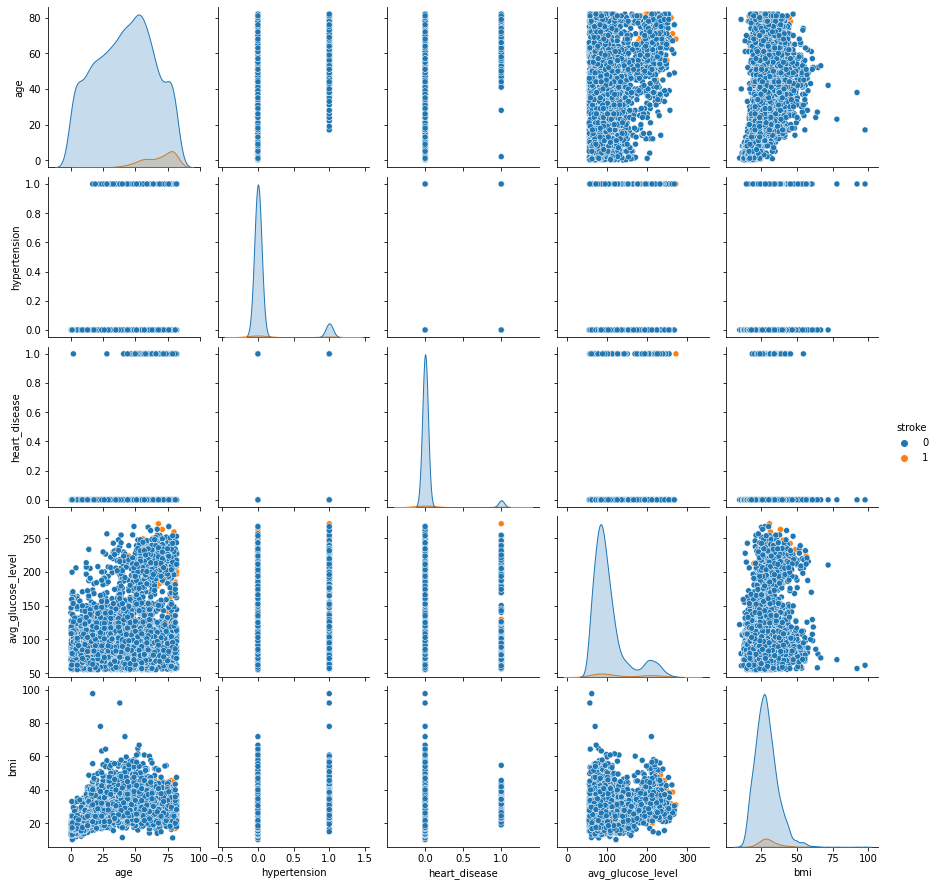

In [24]:
data_frame=pd.read_csv("clean_data.csv",index_col=False)
data_frame.drop('Unnamed: 0',axis=1,inplace=True)
fig=plt.figure(figsize=(20,15))
sns.pairplot(data=data_1,hue="stroke")
plt.show()

#### Skeweness visulization of Numerical Data (Age, BMI, Average Glucose Level) in relation to Stroke

Text(0.5, 1.0, 'Distribution of Average Glucose Level with Stroke')

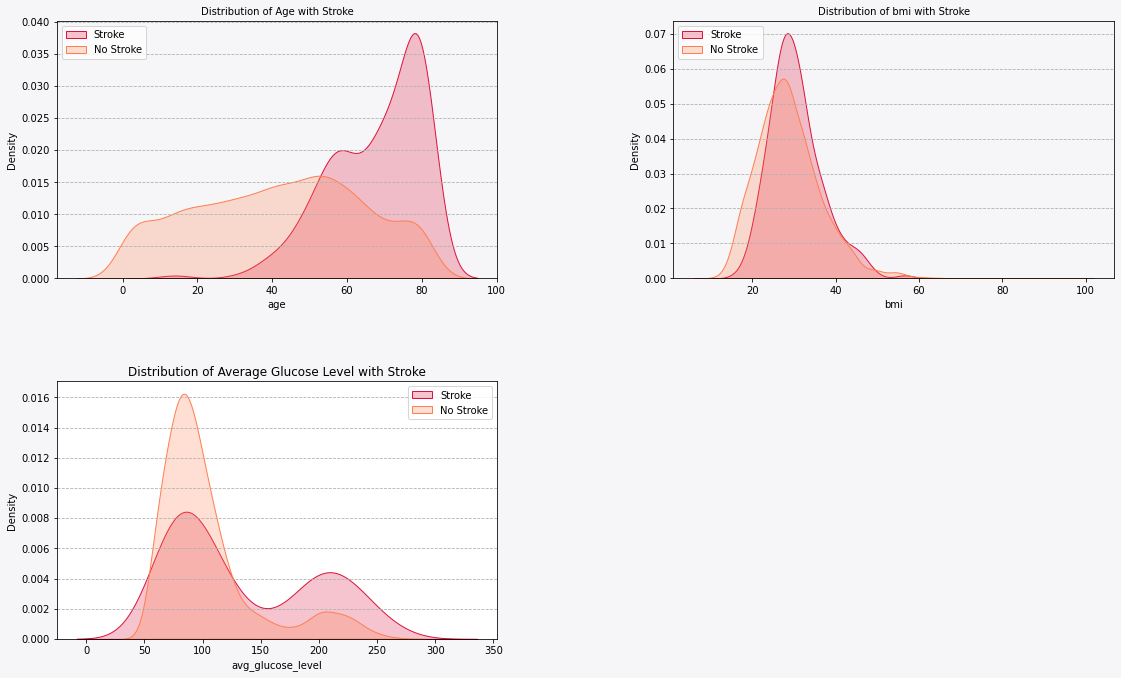

In [25]:
fig=plt.figure(figsize=(30,18))
grid_s=fig.add_gridspec(3,3)
grid_s.update(wspace=0.4,hspace=0.4)

#figure generate
ax0=fig.add_subplot(grid_s[0,0])
ax1=fig.add_subplot(grid_s[0,1])
ax2=fig.add_subplot(grid_s[1,0])



axes=[ax0,ax1]
background_color="#f6f5f7"
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)
#https://www.geeksforgeeks.org/kde-plot-visualization-with-pandas-and-seaborn/

sns.kdeplot(ax=ax0,x=data_1.loc[data_frame["stroke"]==1]["age"],color="crimson",label="Stroke",shade=True)
sns.kdeplot(ax=ax0,x=data_1.loc[data_frame["stroke"]==0]["age"],color="coral",label="No Stroke",shade=True)
ax0.legend(loc="upper left")
ax0.grid(linestyle="--",axis="y")
ax0.set_title("Distribution of Age with Stroke",fontsize=10)

sns.kdeplot(ax=ax1,x=data_1.loc[data_frame["stroke"]==1]["bmi"],color="crimson",label="Stroke",shade=True)
sns.kdeplot(ax=ax1,x=data_1.loc[data_frame["stroke"]==0]["bmi"],color="coral",label="No Stroke",shade=True)
ax1.legend(loc="upper left")
ax1.grid(linestyle="--",axis="y")
ax1.set_title("Distribution of bmi with Stroke",fontsize=10)

sns.kdeplot(ax=ax2,x=data_1.loc[data_frame["stroke"]==1]["avg_glucose_level"],color="crimson",label="Stroke",shade=True)
sns.kdeplot(ax=ax2,x=data_1.loc[data_frame["stroke"]==0]["avg_glucose_level"],color="coral",label="No Stroke",shade=True)
ax2.legend(loc="upper right")
ax2.grid(linestyle="--",axis="y")
ax2.set_title("Distribution of Average Glucose Level with Stroke")







Observation:
For distribution of age the skewness is higher in stroke patients.At the same time, bmi level is higher with stroke patient. Moreover, in response to average glucose level the skewness is extremly higher for people without stroke in comparison to stroked people.

#### Analysing categorical variable with stroke

/home/pinky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pinky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pinky/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pinky/.local/

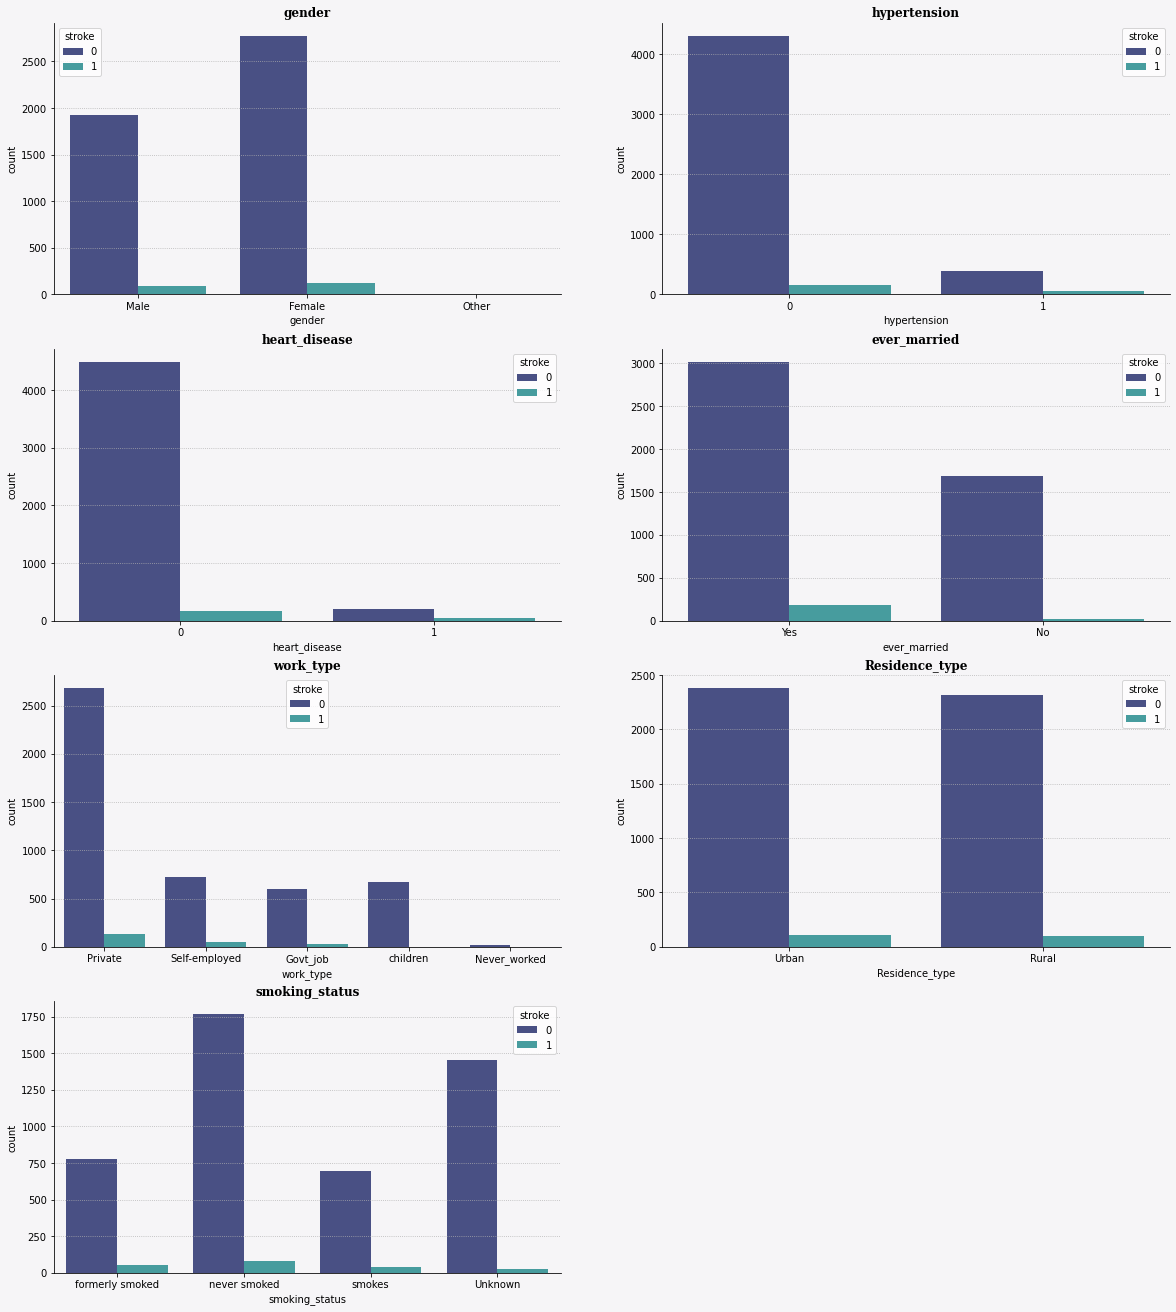

In [26]:
categor_data=data_frame[["gender", "hypertension", "heart_disease", "ever_married","work_type", "Residence_type", 
                       "smoking_status"]]
fig=plt.figure(figsize=(20,23))
background_color = '#f6f5f7'
fig.patch.set_facecolor(background_color) 
for indx,val in enumerate(categor_data.columns):
    ax=plt.subplot(4,2,indx+1)
    ax.set_facecolor(background_color)
    ax.set_title(val,fontweight="bold",fontfamily="serif")
    for i in ["top","right"]:
        ax.spines[i].set_visible(False)
    ax.grid(linestyle=":",axis="y")
    sns.countplot(categor_data[val],palette="mako",hue=data_1["stroke"])

#### Observations
1. The stroke rate in male and female is almost closer but female has more stroke rate than male.
2. People with hypertension and heart disease has very little stroke rate.
3. Comapred to the unmarried people, the stroke rate is higher in married people.
4. Among private, self-employed, Govt job, children and never worked persons the private job holders have the greatest stroke rate.
5. There is almost no differences in stroke occurance in urban and rural area people.
6. People who smokes and formerly smoked combainedly have higher stroke possibility than people who never smoked.

#### Determination of stroke percentage

In [27]:
stroke_percentage = (data_frame['stroke'].value_counts() / len(data_1) * 100)
print(f'{round(stroke_percentage[0], 2)}% did not have a stroke')
print(f'{round(stroke_percentage[1], 2)}% did have a stroke')

95.74% did not have a stroke
4.26% did have a stroke


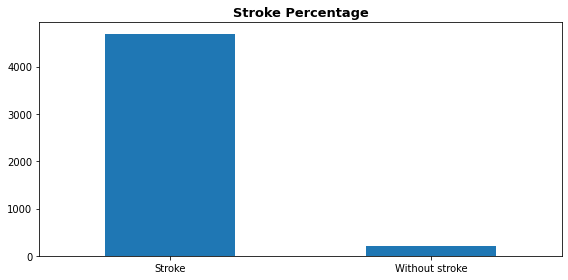

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
name = ["Stroke", "Without stroke"]
ax = data_1.stroke.value_counts().plot(kind='bar')
ax.set_title("Stroke", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)


plt.tight_layout()

#### Correlation Matrix

Text(-1.7, 1.1, 'Heatmap of Data')

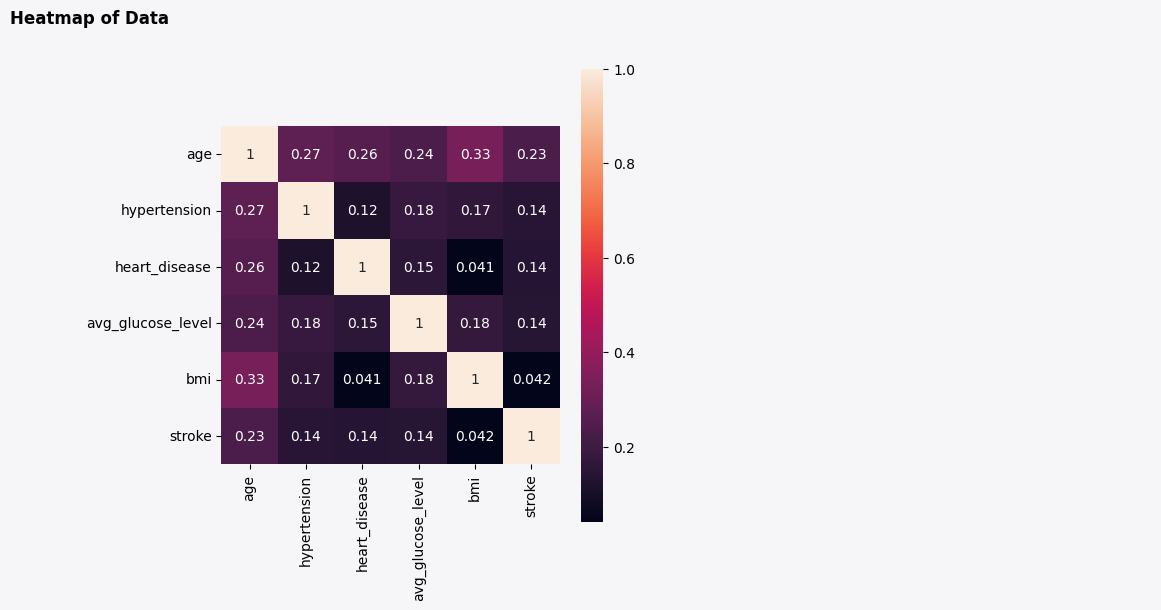

In [29]:
fig=plt.figure(figsize=(12,6),dpi=100)
data_frame=pd.read_csv("clean_data.csv",index_col=False)
data_frame.drop('Unnamed: 0',axis=1,inplace=True)
grid=fig.add_gridspec(1,2)
ax0=fig.add_subplot(grid[0,0])
ax1=fig.add_subplot(grid[0,1])
axes=[ax0,ax1]
backgroud_color="flare"
for i in axes:
    i.set_facecolor(background_color)

fig.patch.set_facecolor(background_color)
corrmat=data_1.corr()
sns.heatmap(ax=ax0,data=corrmat,annot=True,cmap="rocket",square=True)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.tick_params(left=False,bottom=False)
for i in ["top","right","bottom","left"]:
    ax1.spines[i].set_visible(False)
plt.text(-1.7,1.1,"Heatmap of Data",fontsize=12,fontweight="bold")

#### Observation


1. There is no strong correlation between the features.
2. The heighst correlation can be observed between bmi and age.



#### Conversion of Categorical Data into Binary Data

In [31]:
def convert_binary_features(data):
    # convert the binary fields into 1/0
    data['ever_married'] = np.where(data['ever_married'] == 'Yes', 1, 0)
    data['urban'] = np.where(data['Residence_type'] == 'Urban', 1, 0)
    data['male'] = np.where(data['gender'] == 'Male', 1, 0)
    
    # Convert if ever smoked into a binary field
    smoking_list = ['formerly smoked', 'smokes']
    data['smoked'] = np.where(data['smoking_status'].isin(smoking_list), 1, 0)
    
    # BMI is the only null column, for now try imputing the mean value
    median_bmi = data_frame['bmi'].median()
    mean_bmi = data_frame['bmi'].mean()
    data['new_bmi'] = np.where(data['bmi'].isnull(), mean_bmi, data['bmi'])
    data['bmi_imputed'] = np.where(data['bmi'].isnull(), 1, 0)

    # get dummies for work features
    work_dummies = pd.get_dummies(data['work_type'], drop_first=True, prefix='work')
    data = pd.merge(left=data,
                    right=work_dummies,
                    how='left',
                    left_index=True,
                    right_index=True)
    
    
    # standardise glucose and BMI
    data['glucose'] = (data['avg_glucose_level'] - data['avg_glucose_level'].mean()) / data['avg_glucose_level'].std()
    data['body_mass_index'] = (data['new_bmi'] - data['new_bmi'].mean()) / data['new_bmi'].std()
    data['age'] = np.log(data['age'])
    
    # if you have a glucose level over 200 you are v likley to be diabetic - increasing your rish
    data['diabetes'] = np.where(data['avg_glucose_level'] > 200, 1, 0)
    
    # remove old columns from dataset
    drop_cols = ['Residence_type', 'gender', 'bmi', 'work_type', 'smoking_status', 
                'new_bmi', 'avg_glucose_level']
    data = data.drop(drop_cols, axis=1)
    return data


data_frame = convert_binary_features(data_frame)
data_frame.head()

,age,hypertension,heart_disease,ever_married,stroke,urban,male,smoked,bmi_imputed,work_Never_worked,work_Private,work_Self-employed,work_children,glucose,body_mass_index,diabetes
0,4.204693,0,1,0,1,1,1,1,0,0,1,0,0,2.777415,0.981245,1
1,4.382027,0,1,0,1,0,1,0,0,0,1,0,0,0.013840,0.459222,0
2,3.891820,0,0,0,1,1,0,1,0,0,1,0,0,1.483980,0.701135,0
3,4.369448,1,0,0,1,0,0,0,0,0,0,1,0,1.549035,-0.623020,0
4,4.394449,0,0,0,1,1,1,1,0,0,1,0,0,1.821183,0.013593,0


In order to the formation of two-dimentional binary matrix, where particular category is represented by each column, we had to convert the categorical variables into the Dummy variables.

In [32]:
data_frame.to_csv("clean_data_binary_stroke.csv")

##### Data category unique

In [33]:
data_frame.stroke.unique()

array([1, 0])

From the result above the stroke is a binary variable, because it contains only two values (1= with stroke, 0=without stroke) which are polar opposite.